In [391]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

### Read the CSV

In [392]:
df = pd.read_csv("resnet_test_predictions.csv")
print(df.columns)
df.head()


Index(['path_to_image', 'path_to_dcm', 'age', 'sex', 'race', 'insurance_type',
       'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia',
       'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other',
       'Fracture', 'Support Devices', 'Atelectasis.1', 'Consolidation.1',
       'Infiltration', 'Pneumothorax.1', 'Edema.1', 'Emphysema', 'Fibrosis',
       'Effusion', 'Pneumonia.1', 'Pleural_Thickening', 'Cardiomegaly.1',
       'Nodule', 'Mass', 'Hernia', 'Lung Lesion.1', 'Fracture.1',
       'Lung Opacity.1', 'Enlarged Cardiomediastinum.1'],
      dtype='object')


,path_to_image,path_to_dcm,age,sex,race,insurance_type,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,...,Pneumonia.1,Pleural_Thickening,Cardiomegaly.1,Nodule,Mass,Hernia,Lung Lesion.1,Fracture.1,Lung Opacity.1,Enlarged Cardiomediastinum.1
0,train/patient47347/study3/view1_frontal.jpg,train/patient47347/study3/view1_frontal.dcm,78.0,1,0,1,0,0,1,0,...,0.007465,0.151549,0.000189,0.096050,0.219839,0.183554,0.5,0.122367,0.015754,0.5
1,train/patient37527/study12/view1_frontal.jpg,train/patient37527/study12/view1_frontal.dcm,63.0,0,1,2,0,0,0,0,...,0.024813,0.182737,0.000215,0.062246,0.138780,0.004003,0.5,0.104008,0.213574,0.5
2,train/patient41208/study9/view1_frontal.jpg,train/patient41208/study9/view1_frontal.dcm,70.0,0,0,1,0,0,0,1,...,0.011389,0.078824,0.000267,0.130636,0.059724,0.000130,0.5,0.007045,0.130095,0.5
3,train/patient39357/study1/view1_frontal.jpg,train/patient39357/study1/view1_frontal.dcm,79.0,1,1,1,0,0,0,0,...,0.016706,0.025412,0.017056,0.037808,0.081231,0.008917,0.5,0.049271,0.151013,0.5
4,train/patient31982/study4/view1_frontal.jpg,train/patient31982/study4/view1_frontal.dcm,67.0,0,0,0,0,0,0,0,...,0.001799,0.069781,0.000375,0.037836,0.176391,0.144187,0.5,0.354128,0.000756,0.5


### Rename columns

In [393]:
# Rename columns
df.rename(columns={'Enlarged Cardiomediastinum.1': 'Enlarged Cardiomediastinum pred', 'Cardiomegaly.1': 'Cardiomegaly pred',
                   'Enlarged Cardiomediastinum.1': 'Enlarged Cardiomediastinum pred', 'Cardiomegaly.1': 'Cardiomegaly pred',
                   'Lung Opacity.1': 'Lung Opacity pred', 'Lung Lesion.1': 'Lung Lesion pred',
                   'Edema.1': 'Edema pred', 'Consolidation.1': 'Consolidation pred',
                   'Pneumonia.1': 'Pneumonia pred', 'Atelectasis.1': 'Atelectasis pred',
                   'Pneumothorax.1': 'Pneumothorax pred', 'Effusion': 'Pleural Effusion pred',
                   'Fracture.1': 'Fracture pred'}, inplace=True) 
df.head()

,path_to_image,path_to_dcm,age,sex,race,insurance_type,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,...,Pneumonia pred,Pleural_Thickening,Cardiomegaly pred,Nodule,Mass,Hernia,Lung Lesion pred,Fracture pred,Lung Opacity pred,Enlarged Cardiomediastinum pred
0,train/patient47347/study3/view1_frontal.jpg,train/patient47347/study3/view1_frontal.dcm,78.0,1,0,1,0,0,1,0,...,0.007465,0.151549,0.000189,0.096050,0.219839,0.183554,0.5,0.122367,0.015754,0.5
1,train/patient37527/study12/view1_frontal.jpg,train/patient37527/study12/view1_frontal.dcm,63.0,0,1,2,0,0,0,0,...,0.024813,0.182737,0.000215,0.062246,0.138780,0.004003,0.5,0.104008,0.213574,0.5
2,train/patient41208/study9/view1_frontal.jpg,train/patient41208/study9/view1_frontal.dcm,70.0,0,0,1,0,0,0,1,...,0.011389,0.078824,0.000267,0.130636,0.059724,0.000130,0.5,0.007045,0.130095,0.5
3,train/patient39357/study1/view1_frontal.jpg,train/patient39357/study1/view1_frontal.dcm,79.0,1,1,1,0,0,0,0,...,0.016706,0.025412,0.017056,0.037808,0.081231,0.008917,0.5,0.049271,0.151013,0.5
4,train/patient31982/study4/view1_frontal.jpg,train/patient31982/study4/view1_frontal.dcm,67.0,0,0,0,0,0,0,0,...,0.001799,0.069781,0.000375,0.037836,0.176391,0.144187,0.5,0.354128,0.000756,0.5


### Remove columns

In [394]:
df = df.drop(columns=['path_to_image', 'path_to_dcm', 'Infiltration', 'Emphysema', 'Pleural_Thickening', 'Fibrosis', 'Cardiomegaly pred', 'Nodule', 'Mass', 'Hernia', 'Enlarged Cardiomediastinum', 'Enlarged Cardiomediastinum pred', 'Cardiomegaly', 'Pleural Other', 'Lung Lesion', 'Lung Lesion pred'])
df.head()


,age,sex,race,insurance_type,No Finding,Lung Opacity,Edema,Consolidation,Pneumonia,Atelectasis,...,Fracture,Support Devices,Atelectasis pred,Consolidation pred,Pneumothorax pred,Edema pred,Pleural Effusion pred,Pneumonia pred,Fracture pred,Lung Opacity pred
0,78.0,1,0,1,0,0,1,0,0,1,...,1,1,0.216610,0.055912,0.003051,0.000055,0.157161,0.007465,0.122367,0.015754
1,63.0,0,1,2,0,0,0,0,0,0,...,0,0,0.114583,0.043359,0.033759,0.001214,0.155715,0.024813,0.104008,0.213574
2,70.0,0,0,1,0,1,0,0,0,0,...,0,0,0.056805,0.039473,0.005315,0.001584,0.068803,0.011389,0.007045,0.130095
3,79.0,1,1,1,0,0,0,0,1,0,...,0,0,0.343938,0.105555,0.000332,0.001108,0.298742,0.016706,0.049271,0.151013
4,67.0,0,0,0,0,0,0,1,0,0,...,0,0,0.258150,0.051246,0.003836,0.000157,0.263503,0.001799,0.354128,0.000756


### Remove rows that were not processed (all = 0)

In [395]:
initial_size = df.shape[0] 
# Select columns where column names end with 'pred'
pred_columns = df.filter(regex='pred$').columns

# Remove rows where all values in these 'pred' columns are zero
df = df[~(df[pred_columns] == 0).all(axis=1)]
final_size = df.shape[0] 

print(f'Number of removed rows = {initial_size - final_size}')

Number of removed rows = 51


### Set the disease accoring to a threashold

In [396]:
p = 0.5

df_labels = df.copy()

# Apply conversion to 0 or 1 based on the threshold
df_labels[pred_columns] = df[pred_columns].apply(lambda x: (x > p).astype(int))

df_labels.head()

,age,sex,race,insurance_type,No Finding,Lung Opacity,Edema,Consolidation,Pneumonia,Atelectasis,...,Fracture,Support Devices,Atelectasis pred,Consolidation pred,Pneumothorax pred,Edema pred,Pleural Effusion pred,Pneumonia pred,Fracture pred,Lung Opacity pred
0,78.0,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0
1,63.0,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,70.0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,79.0,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,67.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create a no finding pred column

In [397]:
# It will be 1 if all values in 'pred' columns are 0 for a row, and 0 otherwise
df['No Finding pred'] = (df_labels[pred_columns] == 0).all(axis=1).astype(int)
df.head()

,age,sex,race,insurance_type,No Finding,Lung Opacity,Edema,Consolidation,Pneumonia,Atelectasis,...,Support Devices,Atelectasis pred,Consolidation pred,Pneumothorax pred,Edema pred,Pleural Effusion pred,Pneumonia pred,Fracture pred,Lung Opacity pred,No Finding pred
0,78.0,1,0,1,0,0,1,0,0,1,...,1,0.216610,0.055912,0.003051,0.000055,0.157161,0.007465,0.122367,0.015754,1
1,63.0,0,1,2,0,0,0,0,0,0,...,0,0.114583,0.043359,0.033759,0.001214,0.155715,0.024813,0.104008,0.213574,1
2,70.0,0,0,1,0,1,0,0,0,0,...,0,0.056805,0.039473,0.005315,0.001584,0.068803,0.011389,0.007045,0.130095,1
3,79.0,1,1,1,0,0,0,0,1,0,...,0,0.343938,0.105555,0.000332,0.001108,0.298742,0.016706,0.049271,0.151013,1
4,67.0,0,0,0,0,0,0,1,0,0,...,0,0.258150,0.051246,0.003836,0.000157,0.263503,0.001799,0.354128,0.000756,1


### Predictions

In [398]:
df.columns

Index(['age', 'sex', 'race', 'insurance_type', 'No Finding', 'Lung Opacity',
       'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax',
       'Pleural Effusion', 'Fracture', 'Support Devices', 'Atelectasis pred',
       'Consolidation pred', 'Pneumothorax pred', 'Edema pred',
       'Pleural Effusion pred', 'Pneumonia pred', 'Fracture pred',
       'Lung Opacity pred', 'No Finding pred'],
      dtype='object')

In [399]:
# Define a function to compute the required metrics
def compute_metrics(y_true, y_pred):
    # Threshold predictions to create binary classification
    y_pred_bin = (y_pred > 0.5).astype(int)
    
    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_bin).ravel()
    
    # Calculate rates
    tp_rate = tp / (tp + fn) if (tp + fn) else 0
    fp_rate = fp / (fp + tn) if (fp + tn) else 0
    tn_rate = tn / (tn + fp) if (tn + fp) else 0
    fn_rate = fn / (fn + tp) if (fn + tp) else 0
    
    return {
        'Accuracy': accuracy_score(y_true, y_pred_bin),
        'Precision': precision_score(y_true, y_pred_bin, zero_division=0),
        'AUC': roc_auc_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred_bin),
        'TP Rate': tp_rate,
        'FP Rate': fp_rate,
        'TN Rate': tn_rate,
        'FN Rate': fn_rate
    }



# List of diseases
diseases = ['No Finding', 'Lung Opacity',
            'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 
            'Pleural Effusion', 'Fracture']



In [400]:

# Compute metrics for each disease
results = {}
for disease in diseases:
    pred_column = disease + ' pred'
    if pred_column in df.columns:  # Check if prediction column exists
        df.dropna(subset=[disease, pred_column], inplace=True)
        metrics = compute_metrics(df[disease], df[pred_column])
        results[disease] = metrics

# Display or plot overall metrics
for disease, metrics in results.items():
    print(f"{disease}: {metrics}")


No Finding: {'Accuracy': 0.1725754831666956, 'Precision': 0.09614495198193541, 'AUC': 0.5292144379938326, 'F1 Score': 0.17486825502857564, 'TP Rate': 0.9650464227198252, 'FP Rate': 0.9066175467321599, 'TN Rate': 0.09338245326784009, 'FN Rate': 0.034953577280174765}
Lung Opacity: {'Accuracy': 0.5185699754385095, 'Precision': 0.609258337481334, 'AUC': 0.559988694448768, 'F1 Score': 0.11202123278268428, 'TP Rate': 0.06168111267889538, 'FP Rate': 0.03836192151688413, 'TN Rate': 0.9616380784831159, 'FN Rate': 0.9383188873211046}
Edema: {'Accuracy': 0.7597191554816781, 'Precision': 0.0, 'AUC': 0.5964178864322158, 'F1 Score': 0.0, 'TP Rate': 0.0, 'FP Rate': 0.0, 'TN Rate': 1.0, 'FN Rate': 1.0}
Consolidation: {'Accuracy': 0.9381497010444836, 'Precision': 0.0, 'AUC': 0.5948516161537278, 'F1 Score': 0.0, 'TP Rate': 0.0, 'FP Rate': 0.0, 'TN Rate': 1.0, 'FN Rate': 1.0}
Pneumonia: {'Accuracy': 0.9756369861314412, 'Precision': 0.0, 'AUC': 0.5617021193951391, 'F1 Score': 0.0, 'TP Rate': 0.0, 'FP Rate

In [401]:
# Compute metrics for each disease
auc = {}
for disease in diseases:
    pred_column = disease + ' pred'
    if pred_column in df.columns:  # Check if prediction column exists
        metrics = compute_metrics(df[disease], df[pred_column])
        auc[disease] = metrics['AUC']

print("General AUC::", auc)

General AUC:: {'No Finding': 0.5292144379938326, 'Lung Opacity': 0.559988694448768, 'Edema': 0.5964178864322158, 'Consolidation': 0.5948516161537278, 'Pneumonia': 0.5617021193951391, 'Atelectasis': 0.6149985718568793, 'Pneumothorax': 0.6194473694949908, 'Pleural Effusion': 0.733955048003003, 'Fracture': 0.4719519472844311}


In [402]:

true_results_resnet = {
    "Atelectasis": 0.63,
    "Consolidation": 0.74,
    "Edema": 0.79,
    "Fracture": 0.58,
    "Lung Opacity": 0.71,
    "Pleural Effusion": 0.81,
    "Pneumonia": 0.67,
    "Pneumothorax": 0.61
}


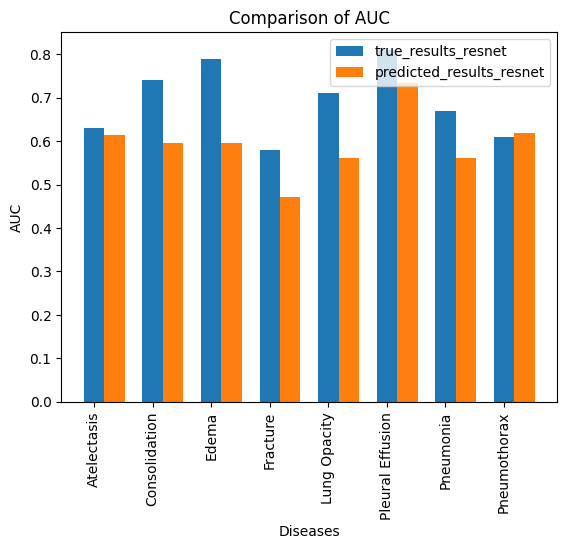

In [403]:

# Extract diseases and AUC values
diseases = list(true_results_resnet.keys())
values1 = [true_results_resnet[disease] for disease in diseases]
values2 = [auc[disease] for disease in diseases]

# Setting the positions and width for the bars
positions = np.arange(len(diseases))
bar_width = 0.35

# Plotting the bars
fig, ax = plt.subplots()
bar1 = ax.bar(positions, values1, width=bar_width, label='true_results_resnet')
bar2 = ax.bar(positions + bar_width, values2, width=bar_width, label='predicted_results_resnet')


# Adding some text for labels, title, and axes ticks
ax.set_xlabel('Diseases')
ax.set_ylabel('AUC')
ax.set_title('Comparison of AUC')
ax.set_xticks(positions)
ax.set_xticklabels(diseases, rotation='vertical')  # Rotating labels vertically
ax.legend()

# Show the plot
plt.show()


### Study one metric

In [404]:
met = 'Accuracy'
diseases = ['No Finding', 'Lung Opacity',
            'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 
            'Pleural Effusion', 'Fracture']


In [405]:
# Compute metrics for each disease
auc = {}
for disease in diseases:
    pred_column = disease + ' pred'
    if pred_column in df.columns:  # Check if prediction column exists
        metrics = compute_metrics(df[disease], df[pred_column])
        auc[disease] = metrics[met]

print(f"General {met}", auc)

General Accuracy {'No Finding': 0.1725754831666956, 'Lung Opacity': 0.5185699754385095, 'Edema': 0.7597191554816781, 'Consolidation': 0.9381497010444836, 'Pneumonia': 0.9756369861314412, 'Atelectasis': 0.8344704393777755, 'Pneumothorax': 0.8981566477286823, 'Pleural Effusion': 0.611333019078572, 'Fracture': 0.9519190215099115}


In [406]:
# Initialize dictionaries to store AUC values
auc_female = {}
auc_male = {}

# Filter DataFrame by sex and compute AUC for each disease
for sex, auc_dict in [(1, auc_female), (0, auc_male)]:
    df_sex = df[df['sex'] == sex]
    for disease in diseases:
        pred_column = disease + ' pred'
        if pred_column in df_sex.columns:
            metrics = compute_metrics(df_sex[disease], df_sex[pred_column])
            auc_dict[disease] = metrics[met]

# Output results
print(f"{met} for Females: {auc_female}")
print(f"{met} for Males: {auc_male}")

Accuracy for Females: {'No Finding': 0.17214471506266257, 'Lung Opacity': 0.5180302672026483, 'Edema': 0.755734216126744, 'Consolidation': 0.9408252541972097, 'Pneumonia': 0.9747576259162922, 'Atelectasis': 0.8431071175218727, 'Pneumothorax': 0.9012177819815559, 'Pleural Effusion': 0.6135611255615985, 'Fracture': 0.9571411681248522}
Accuracy for Males: {'No Finding': 0.17288700782352187, 'Lung Opacity': 0.5189602838698645, 'Edema': 0.7626010003847634, 'Consolidation': 0.9362147834637253, 'Pneumonia': 0.9762729254841606, 'Atelectasis': 0.8282245308024454, 'Pneumothorax': 0.8959428840152195, 'Pleural Effusion': 0.609721687828652, 'Fracture': 0.9481424479500663}


In [407]:
# Initialize dictionaries to store AUC values
auc_white = {}
auc_black = {}
auc_asian = {}

# Filter DataFrame by sex and compute AUC for each disease
for race, auc_dict in [(0, auc_white), (1, auc_asian), (2, auc_black)]: 
    df_race = df[df['race'] == race]
    for disease in diseases:
        pred_column = disease + ' pred'
        if pred_column in df_sex.columns:
            metrics = compute_metrics(df_race[disease], df_race[pred_column])
            auc_dict[disease] = metrics[met]

# Output results
print(f"{met} for W: {auc_white}")
print(f"{met} for B: {auc_black}")
print(f"{met} for A: {auc_asian}")

Accuracy for W: {'No Finding': 0.17195876288659795, 'Lung Opacity': 0.5161934972244251, 'Edema': 0.7561300555114988, 'Consolidation': 0.9382394924662966, 'Pneumonia': 0.9765900079302141, 'Atelectasis': 0.8301982553528945, 'Pneumothorax': 0.8972244250594766, 'Pleural Effusion': 0.6068199841395717, 'Fracture': 0.9492783505154639}
Accuracy for B: {'No Finding': 0.17019798541160125, 'Lung Opacity': 0.544633553317124, 'Edema': 0.7356721083709621, 'Consolidation': 0.942341090656478, 'Pneumonia': 0.968391802709274, 'Atelectasis': 0.8541160125043418, 'Pneumothorax': 0.9291420632163946, 'Pleural Effusion': 0.6842653699201111, 'Fracture': 0.9652657172629385}
Accuracy for A: {'No Finding': 0.17702862951041842, 'Lung Opacity': 0.5185498898864984, 'Edema': 0.7906149415551414, 'Consolidation': 0.9356259529053024, 'Pneumonia': 0.9740809757750296, 'Atelectasis': 0.8477045570049128, 'Pneumothorax': 0.8880230391326445, 'Pleural Effusion': 0.599864475690327, 'Fracture': 0.959512112485177}


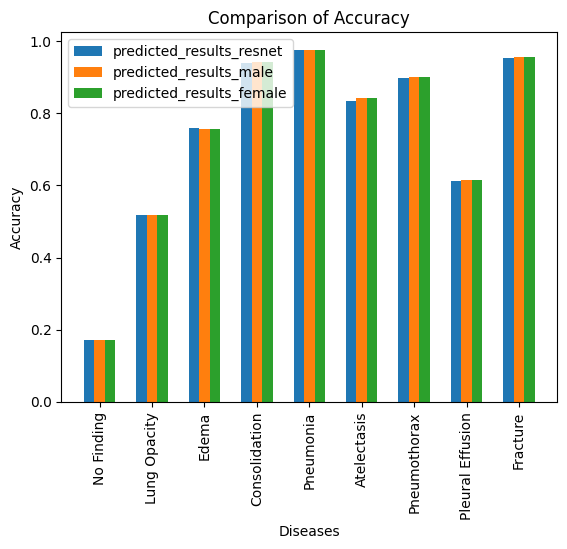

In [408]:

# Extract diseases and AUC values
diseases = list(auc.keys())
values2 = [auc[disease] for disease in diseases]
values_male = [auc_female[disease] for disease in diseases]
values_female = [auc_female[disease] for disease in diseases]

# Setting the positions and width for the bars
positions = np.arange(len(diseases))
bar_width = 0.2

# Plotting the bars
fig, ax = plt.subplots()
bar2 = ax.bar(positions - bar_width, values2, width=bar_width, label='predicted_results_resnet')
bar3 = ax.bar(positions, values_male, width=bar_width, label='predicted_results_male')
bar4 = ax.bar(positions + bar_width, values_female, width=bar_width, label='predicted_results_female')


# Adding some text for labels, title, and axes ticks
ax.set_xlabel('Diseases')
ax.set_ylabel(met)
ax.set_title(f'Comparison of {met}')
ax.set_xticks(positions)
ax.set_xticklabels(diseases, rotation='vertical')  # Rotating labels vertically
ax.legend()

# Show the plot
plt.show()


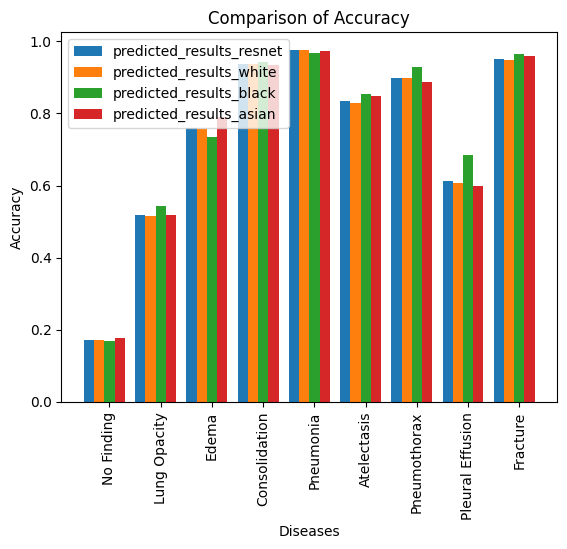

In [409]:

# Extract diseases and AUC values
diseases = list(auc.keys())
values2 = [auc[disease] for disease in diseases]
values_white = [auc_white[disease] for disease in diseases]
values_black = [auc_black[disease] for disease in diseases]
values_asian = [auc_asian[disease] for disease in diseases]

# Setting the positions and width for the bars
positions = np.arange(len(diseases))
bar_width = 0.2

# Plotting the bars
fig, ax = plt.subplots()
bar2 = ax.bar(positions - 2*bar_width, values2, width=bar_width, label='predicted_results_resnet')
bar3 = ax.bar(positions - bar_width, values_white, width=bar_width, label='predicted_results_white')
bar4 = ax.bar(positions, values_black, width=bar_width, label='predicted_results_black')
bar5 = ax.bar(positions + bar_width, values_asian, width=bar_width, label='predicted_results_asian')


# Adding some text for labels, title, and axes ticks
ax.set_xlabel('Diseases')
ax.set_ylabel(met)
ax.set_title(f'Comparison of {met}')
ax.set_xticks(positions)
ax.set_xticklabels(diseases, rotation='vertical')  # Rotating labels vertically
ax.legend()

# Show the plot
plt.show()
